# Homework 9: Bayesian Models and Neural Networks

By Rachel Manzelli and Brian Kulis with the help of N. Frumkin, K. Chauhan, and A. Tsiligkaridis

## Problem 1: Bayesian Models

Paleobotanists estimate the moment in the past when a 
given species became extinct by taking cylindrical, vertical core 
samples below the earth's surface, and looking for the last
occurrence of the species in the fossil record. This is measured in meters
above the point $P$ at which the species was known to have first
emerged.  

Letting $\{y_i, i = 1, \ldots, n\}$ denote a sample of
such distances above $P$ at a random set of locations, the model can be represented as

\begin{equation*}
(y_i | \theta) \sim \mbox{Unif}(0,\theta)
\end{equation*}

In this model the unknown $\theta > 0$ can be used to estimate
the species extinction time through carbon dating.  *This problem is about Bayesian inference for $\theta$, and it will be seen that some of our usual intuitions do not quite hold in this case.*

**a.** Show that the likelihood may be written as

\begin{equation*}
l(\theta | y) = 
\theta^{-n} I(\theta \geq \max(y_1, \ldots, y_n)),
\end{equation*}

where $I$ is the **indicator function**, i.e. $I(A) = 1 $ if $A$ is true and 0 otherwise.

**Answer:**

We know that 

$l(\theta | y_i) = p(y_i | \theta) p(\theta)$

We also know that 

$p(y_i | \theta) = \sum_{i=0}^{n} 1/\theta = 1/\theta^n = \theta^{-n}$, since this is a uniform distribution from 0 to $\theta$

We also know that for $p(y_i | \theta)$ to be a valid uniform distribution, that:

$(0<= y_i <= \theta$ for all $i=1,...,n)$

If this is not true, then $p(y_i | \theta)$ is not a valid uniform distribution, and $l(\theta | y_i) = 0$

$(0<= y_i <= \theta$ for all $i=1,...,n)$ can be rewritten as:

$(0<= y_1, y_2, ..., y_n <= \theta)$, or equivilently:

$(0<= max(y_1,...,y_n) <= \theta)$

Since we now have that if $(\theta >= max(y_1,...,y_n))$ is false, then $l(\theta | y_i) = 0$, and if it is true, then $l(\theta | y_i) = p(y_i | \theta)*(1) = \theta^{-n}$

Therefore, we can write the likelihood function as:

$l(\theta | y_i) = \theta^{-n}I(\theta \geq \max(y_1, \ldots, y_n))$

**b.** The Pareto distribution (written $\theta \sim \mbox{Pareto}(\alpha,\beta)$
has density/PDF:

\begin{equation*}
p(\theta) = \left\{
\begin{array}{cc}
\alpha \beta^\alpha \theta^{-(\alpha + 1)} & \mbox{if}\ \theta \geq \beta \\
0 & \mbox{otherwise}
\end{array},
\right .
\end{equation*}
where $\alpha, \beta > 0$.

With the likelihood viewed as a constant multiple of a
density for $\theta$, show that the likelihood corresponds to
the $\mbox{Pareto}(n-1,m)$ distribution, *where you will need to determine m.*

Now, let the prior
for $\theta$ be taken to be $\mbox{Pareto}(\alpha,\beta)$
and derive the posterior distribution $p(\theta | y)$.

Is the Pareto conjugate to the uniform? As discussed in class, a likelihood and prior are conjugate pairs if the posterior distribution is in the same class (in this case, a Pareto distribution) as the prior.

**Answer:**

Since the likelihood is:

$l(\theta | y_i) = \theta^{-n}I(\theta \geq \max(y_1, \ldots, y_n))$

It corresponds to a Pareto distribution i the sense that it is a constant (1) multiplied by theta to the power of a negative exponent, the exponent in this case being -n. So to find the value for m, we need to solve the constant term for $\beta$

$\alpha\beta^\alpha = 1$, where $\alpha = n-1$

$(n-1)\beta^{-(n-1)} = 1$

$\beta^{-(n-1)} = 1/(n-1)$

$\beta^{n-1} = n-1$

$\beta = (n-1)^{-(n-1)}$

Giving us $m = (n-1)^{-(n-1)}$, and showing us that the likelihood is a Pareto($n-1$,$(n-1)^{-(n-1)}$) distribution. 

To find the posterior, we simply perform the calculation:

$p(\theta | y) = p(y | \theta) p(\theta)$

\begin{equation*}
= \left\{
\begin{array}{cc}
\alpha \beta^\alpha \theta^{-(\alpha + 1)} \theta^{-n} & \mbox{if}\ \theta \geq \beta \\
0 & \mbox{otherwise}
\end{array},
\right .
\end{equation*}

\begin{equation*}
= \left\{
\begin{array}{cc}
\alpha \beta^\alpha \theta^{-(\alpha + n + 1)} & \mbox{if}\ \theta \geq \beta \\
0 & \mbox{otherwise}
\end{array},
\right .
\end{equation*}

This is a conjucate pair, since this derived posterior is still a Pareto distribution.

**c.** In an experiment conducted in the Antarctic in the
1980's to study a particular species of fossil ammonite,
the following was a linearly rescaled version of the data
obtained, in ascending order: 

$y = (0.4, 1.0, 1.5, 1.7, 2.0, 2.1, 3.1, 3.7, 4.3, 4.9)$.  

Prior information equivalent to a Pareto prior with $(\alpha,\beta) = (2.5,4)$ was available. Plot the prior, likelihood, and posterior distributions arising from this data set on the same graph, and briefly discuss what this picture implies about the updating of information from prior to posterior in this case.

**Explanation:**

Updating from prior to posterior lowers the values on the graph, closer to what the actual likelihood. Other than that, the distributions have the same general shape.

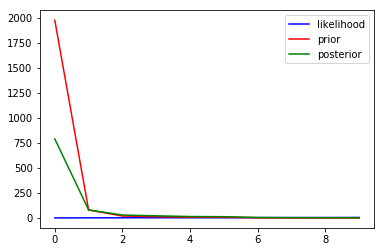

In [3]:
# If you choose to program the plot, please do so within Jupyter here.
# Make sure to explain the plot, as indicated in the question!
from matplotlib import pyplot as plt
import numpy as np

y = np.array([0.4, 1.0, 1.5, 1.7, 2.0, 2.1, 3.1, 3.7, 4.3, 4.9])
n = 10
alpha = 2.5
beta = 4

prior = np.zeros((n, 1))
posterior = np.zeros((n, 1))

for i in range(n):
    prior[i] = alpha*(beta**alpha)*(y[i]**(-(alpha+1)))
    posterior[i] = alpha*(beta**alpha)*(y[i]**(-(alpha)))

plt.plot(range(n), y, 'b-', label="likelihood")
plt.plot(range(n), prior, 'r-', label="prior")
plt.plot(range(n), posterior, 'g-', label="posterior")
plt.legend()
plt.show()

## Problem 2: Limitations of the Perceptron

We aim to train a perceptron to model the logic functions **OR**$(x_1,x_2)$ and **XNOR**$(x_1, x_2)$, using the set of four 2D points, $x \in \{(0,0)^T, (1,0)^T, (0,1)^T, (1,1)^T\}$.

In order to model **OR**$(x_1,x_2)$, the perceptron classifier must output $1$ for $x \in \{(1,0)^T,(0,1)^T, (1,1)^T\}$ and output $0$ if $x = (0,0)^T$. The perceptron classifier (activation threshold of the perceptron) is represented by $f(x) =\mathbf 1[ w^Tx + b > 0]$.

Instead of using a bias vector $b$, we can augment the data by $1$ and use a linear classifier: $f(x) =\mathbf 1[ w^T x > 0 ]$. To do this, we replace $x$ with $x$ $\in \{(1,1,0)^T,(1,0,1)^T, (1,1,1)^T, (1,0,0)\}$ and $w$ with a vector in $\mathbb{R^3}$.

**a.** Using the initial weight vector $w_0 = (0,0,0)^T$ and the [perceptron algorithm](https://www.cs.cmu.edu/~avrim/ML10/lect0125.pdf), derive the $w$ that models the **OR**$(x_1,x_2)$ function. **You can do this either manually (i.e. writing out the weight updates) or by programming the algorithm in Jupyter.** Before you begin, you should normalize your data.

In [5]:
# If you choose to program your algorithm, do so here. 
# Do not use sklearn except where we used it :).
# We have started you off. Fill in places where we've written "YOUR CODE HERE".
from sklearn.preprocessing import normalize
import numpy as np

# Step 1. Initialize weight vector & define data.
x = np.array([[1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 0]]) # given data
y = np.array([1, 1, 1, 0]) # correct predictions
w = np.array([0, 0, 0])

# Normalize each sample to have norm 1.
x = normalize(x, norm='l2')

# Step 2. Activation threshold (prediction).
def predict(sample, weights):
    ## YOUR CODE HERE: Return the prediction (1 or 0) based on the activation threshold
    pred = weights.T @ sample
    
    if pred > 0:
        return 1
    else:
        return 0
    ##

# Step 3. Updating weights.
def update(w, x, y, epochs):
    for j in range(epochs):
        i = 0
        for sample in x:
            # Make prediction using the above function
            prediction = predict(sample, w)
            
            ## YOUR CODE HERE: Update weights according to the link above (pg. 2)
            # Hint: how do we usually update weights? Use the true label somewhere...
            if y[i] != prediction and y[i] == 1:
                w = w + sample
            elif y[i] != prediction and y[i] == 0:
                w = w - sample
            ##
            
            i += 1
            # This will help us see how often we make mistakes
            print("Weight vector on epoch ", j, " sample ", i, "is ", w)
    return w

# Now, run the perceptron! Remember, you are done when the weight vector stabilizes.
epochs = 4 # "stop criteria" - arbitrary, feel free to change as you see fit.
w_new = update(w, x, y, epochs)
print("The final weight vector to model OR(x1,x2) with this data is: ", w_new)

Weight vector on epoch  0  sample  1 is  [0.70710678 0.70710678 0.        ]
Weight vector on epoch  0  sample  2 is  [0.70710678 0.70710678 0.        ]
Weight vector on epoch  0  sample  3 is  [0.70710678 0.70710678 0.        ]
Weight vector on epoch  0  sample  4 is  [-0.29289322  0.70710678  0.        ]
Weight vector on epoch  1  sample  1 is  [-0.29289322  0.70710678  0.        ]
Weight vector on epoch  1  sample  2 is  [0.41421356 0.70710678 0.70710678]
Weight vector on epoch  1  sample  3 is  [0.41421356 0.70710678 0.70710678]
Weight vector on epoch  1  sample  4 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  2  sample  1 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  2  sample  2 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  2  sample  3 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  2  sample  4 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  3  sample  1 is  [-0.58578644  0.70710678  

**b.** We just showed that a perceptron can model **OR**$(x_1, x_2)$ successfully. Prove that a perceptron can't model **XNOR**$(x_1, x_2)$. *Hint: think about linearity.*

**Answer:**

XNOR(x1, x2) cannot be modeled by a perceptron because XNOR is not linearly seperable. If we think about four points at (0,0), (0,1), (1,0), (1,1), and graph it ,we get a square of four points. The issue arrises when we realize that after running a XNOR function on each of the four points, we realize that point (0,0) and (1,1) should have a label of 1, and (1,0), and (0,1) should have a label of 0. This means that the opposite corners of the square have the same label, which means there is no way to linearly separate these classes.
This can be shown with inequalities. Consider point (x1, x2) with weights (w1, w2):

$xnor(x1, x2): x1.w1 + x2.w2:$

$xnor(0,0): 0*w1 + 0*w2 >= 0 $ (label 1)

$0 >= 0 $

$xnor(0,1): 0*w1 + 1*w2 < 0 $ (label 0) 

$w2 < 0 $

$xnor(1,0): 1*w1 + 0*w2 < 0 $ (label 0)

$w1 < 0 $

$xnor(1,1): 1*w1 + 1*w2 >= 0 $ (label 1)

$w1 + w2 >= 0 $

Following this logic, for a XNOR perceptron, both w1 and w2 need to individually be less than 0, but their sum must be greater than or equal to zero. Clearly, this is impossible, making an XNOR perceptron model impossible.

## Problem 3: Neural Networks and the XNOR Problem

So, the perceptron can't model the **XNOR**$(x_1, x_2)$ function. We now want to design a neural network (by hand) to solve the **XNOR** problem. 

**a.** Write the **XNOR** function in terms of the logical functions **OR**$(x_1,x_2)$, **AND**$(x_1,x_2)$, **NOR**$(x_1,x_2)$. 

**Answer:**

The XNOR function can be written in the following terms:

**XNOR**$(x_1, x_2) = x1.x2 + x1'.x2' = x1.x2 + (x1+x2)'$

Or, equivalently:

**XNOR**$(x_1, x_2) =$ **OR**$($**AND**$(x_1,x_2), $ **NOR**$(x_1, x_2))$

**b.** We will now design a network to model this function, using the hyperbolic tangent ([$tanh$](http://reference.wolfram.com/language/ref/Tanh.html)) as the activation function in all of the nodes. The network will take two binary variables as input, and output 1 only when the inputs are both 0 or both 1.

The $tanh$ function outputs [-1,+1], not our desired output of [0,1]. Thus, we have appropriately changed the OR node to take +1/-1 as inputs. Also, we have added an extra last layer to convert the final output from +1/-1 to 0/1.

*Hint: assume that $tanh$ outputs -1 for any input $x\leq -2$, +1 for any input $x\geq 2$, and 0 for $x=0$.*

<img src="xnor1.png" style="height:130px;"><img src="xnor2.png" style="height:110px;">

What are the missing weights $a,b,c,d,e,f$ of the **OR**, **NAND**, **AND** and **CONVERT** subnetworks, respectively?

**Answer:**

We can start with **OR** to solve for a:

(0 or 0 = 0): $tanh(-1*2 + (-1)*2 + 1*a) = -1$

$-4 + a <= -2$

(0 or 1 = 1): $tanh(-1*2 + 1*2 + 1*a) = 1$

$a >= 2$

(1 or 0 = 1): $tanh(1*2 + (-1)*2 + 1*a) = 1$

$a >= 2$

(1 or 1 = 1): $tanh(1*2 + 1*2 + 1*a) = 1$

$4 + a >= 2$

Solving these inequalities, we find that **a = 2**

We can continue with **NOR** to solve for b:

(0 nor 0 = 1): $tanh(0*(-4) + 0*b + 1*2) = 1$

$2 >= 2$

(0 nor 1 = 0): $tanh(0*(-4) + 1*b + 1*2) = -1$

$b + 2 <= -2$

(1 nor 0 = 0): $tanh(1*(-4) + 0*b + 1*2) = -1$

$-2 <= -2$

(1 nor 1 = 0): $tanh(1*(-4) + 1*b + 1*2) = -1$

$-2 + b <= -2$

Solving these inequalities, we find that **b = -4**

We can continue with **AND** to solve for c and d:

(0 and 0 = 0): $tanh(0*4 + 0*d + 1*c) = -1$

$ c <= -2$

(0 and 1 = 0): $tanh(0*4 + 1*d + 1*c) = -1$

$d + c <= -2$

(1 and 0 = 0): $tanh(1*4 + 0*d + 1*c) = -1$

$4 + c <= -2$

(1 and 1 = 1): $tanh(1*4 + 1*d + 1*c) = 1$

$4 + d + c >= 2$

Solving these inequalities, we find that **c = -6**, and **d = 4**

We can continue with **CONVERT** to solve for e and f:

(-1 = 0): $tanh((-1)*f + 1*e) = 0$

$-f + e = 0$

(1 = 1): $tanh(1*f + 1*e) = 1$

$f + e >= 2$

Solving these inequalities, we find that **e = 1**, and **f = 1**

These solutions could all be more negative or more positive and still solve the inequalities, but I went with the simplest solutions for all of them. 

This gives us all of the following values for the missing weights:
**a = 2**, **b = -4**, **c = -6**, **d = 4**, **e = 1**, and **f = 1**